# Chap6 聚类算法Kmeans

## 1.概述

### 1.1 无监督学习与聚类算法

**监督和无监督**

- 有监督学习：模型在训练的时候，即需要特征矩阵X，也需要真实标签y。
- 无监督学习：在训练的时候只需要特征矩阵X，不需要标签。
  - PCA主成分分析 降维
  - 聚类算法，其目的是将数据划分成有意义或有用的组（或簇） 

**聚类和分类**

| 区别 |聚类 | 分类
|---|---|---|
核心| 将数据分成多个组，探索每个组的数据是否有联系|从已经分组的数据中去学习|把新数据放到已经分好的组中去
学习类型 |无监督，无需标签进行训练 |有监督，需要标签进行训练
典型算法| K-Means，DBSCAN，层次聚类，光谱聚类 | 决策树，贝叶斯，逻辑回归
算法输出|**聚类结果是不确定的**，不一定总是能够反映数据的真实分类，同样的聚类，根据不同的业务需求，可能是一个好结果，也可能是一个坏结果 |分类结果是确定的，分类的优劣是客观的，不是根据业务或算法需求决定

### 1.2 sklearn中的聚类算法

聚类算法在sklearn中有两种表现形式：

- 一种是类，需要实例化，训练并使用接口和属性来调用结果。
- 另一种是函数（function），只需要输入特征矩阵和超参数，即可返回聚类的结果和各种指标。


**输入数据**

需要注意的一件重要事情是，该模块中实现的算法可以采用不同类型的矩阵作为输入。 所有方法都接受形状[n_samples，n_features]的**标准特征矩阵**，这些可以从sklearn.feature_extraction模块中的类中获得。对于亲和力传播，光谱聚类和DBSCAN，还可以输入形状[n_samples，n_samples]的相似性矩阵，我们可以使用sklearn.metrics.pairwise模块中的函数来获取相似性矩阵
  - 输入标准特征举证更加常见


## 2.KMeans

- K是超参数 需要人为设定
  
### 2.1 KMeans是如何工作的

**关键概念：簇与质心**

KMeans算法将一组N个样本的特征矩阵X划分为**K个无交集的簇**，直观上来看是簇是一组一组聚集在一起的数据，在一个簇中的数据就认为是同一类。簇就是聚类的结果表现。**簇中所有数据的均值通常被称为这个簇的“质心”**

**过程** 

1 随机抽取K个样本作为最初的质心  
2 开始循环：  
    2.1 将每个样本点分配到离他们最近的质心，生成K个簇  
    2.2 对于每个簇，计算所有被分到该簇的样本点的平均值作为新的质心  
3 当质心的位置不再发生变化，迭代停止，聚类完成  

### 2.2 簇内误差平方和的定义和解惑

- 被分在同一个簇中的数据是有相似性的，而不同簇中的数据是不同的
- 聚类算法也是同样的目的，我们追求“簇内差异小，簇外差异大”。
  - 差异：由样本点到其所在簇的质心的距离来衡量。
- 对于一个簇来说，所有样本点到质心的距离之和越小，我们就认为这个簇中的样本越相似，簇内差异就越小。
- 整体平方和最小 ---> 梯度下降来求解
- 不求解参数的话就没有损失函数
- sklearn中不能选择距离，只能是欧几里得距离

### 2.3 KMeans算法的时间复杂度

KMeans算法的平均复杂度是O(k*n*T)，其中k是所需要输入的簇数，n是整个数据集中的样本量，T是所需要的迭代次数（相对的，KNN的平均复杂度是O(n)）

## 3 sklearn.cluster.KMeans

```
class sklearn.cluster.KMeans (n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001,
precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm=’auto’)
```

### 3.1 重要参数n_clusters

n_clusters是KMeans中的k。这是KMeans当中唯一一个必填的参数，默认为8类，但通常我们的聚类结果会是一个小于8的结果。

#### 3.1.1 先进行一次聚类看看吧

- `make_blobs(数据量，特征，中心)`
- 重要属性`labels_` 查看聚好类的类别，每个样本对应的类
- 重要属性`cluster_center_` 查看质心
- 重要属性`inertia_` 查看总得距离平方和
  - 不能通过条件K来调整模型的距离平方和
  - inertia_ 不是一个有效的模型评估指标

In [4]:
from sklearn.datasets import make_blobs  # 创建数据的库
import matplotlib.pyplot as plt

In [5]:
# 创建数据集

X,y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)
X.shape

(500, 2)

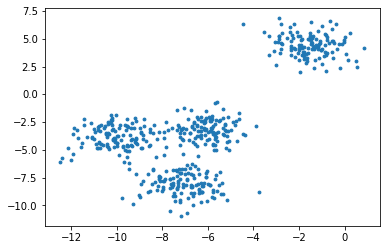

In [6]:
# 查看数据的分布
fig, ax1 = plt.subplots(1)  # 生成1个子图

ax1.scatter(X[:,0],X[:,1],
            marker='o',   # 点的形状
            s=8           # 点的大小
            )
plt.show()

In [7]:
from sklearn.cluster import KMeans

n_cluster = 3

In [8]:
cluster = KMeans(n_clusters=n_cluster,random_state=0).fit(X)

In [9]:
# 重要属性labels_ 查看聚好类的类别，每个样本对应的类
y_pred = cluster.labels_
y_pred

array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

In [10]:
# KMeans 也有接口predict和fit_predict
# 但是不直接使用predict

pre = cluster.fit_predict(X)
pre == y_pred

# 两者返回的数据一致

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

- 我们什么时候需要predict呢？

当数据量太大的时候！

其实我们不必使用所有的数据来寻找质心，少量的数据就可以帮助我们确定质心了。当我们数据量非常大的时候，我们可以使用部分数据来帮助我们确认质心剩下的数据的聚类结果，使用predict来调用

In [11]:
cluster_smallsub = KMeans(n_clusters=n_cluster,random_state=0).fit(X[:200])
# 对数据进行切片

In [12]:
y_pred_ = cluster_smallsub.predict(X)

In [13]:
y_pred == y_pred_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

但从运行得出这样的结果，肯定与直接fit全部数据会不一致。有时候，当我们不要求那么精确，或者数据量实在太大，那我们可以使用这种方法，使用接口predict


In [14]:
# cluster_centers 查看质心
centroid = cluster.cluster_centers_
centroid

array([[-8.0807047 , -3.50729701],
       [-1.54234022,  4.43517599],
       [-7.11207261, -8.09458846]])

In [15]:
centroid.shape
# 3个簇 2个特征

(3, 2)

In [16]:
# inertia_ 查看总得距离平方和
ineria = cluster.inertia_
ineria

1903.5607664611757

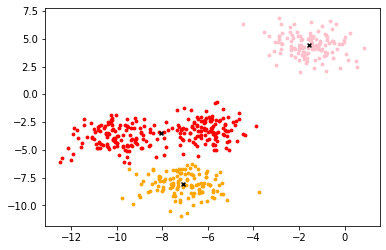

In [17]:
#————————————聚类可视化————————————
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)

for i in range(n_cluster):
    ax1.scatter(X[y_pred==i,0],X[y_pred==i,1],
                marker='o',
                s=8,
                c=color[i]
                )

ax1.scatter(centroid[:,0],centroid[:,1]
            ,marker="x"
            ,s=15
            ,c="black")
plt.show()
n_clusters = 4

In [18]:
#————————————更改聚类数————————————
n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

908.3855684760617

In [19]:
#————————————更改聚类数————————————
n_clusters = 5
cluster_5 = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_5.inertia_
inertia_

# 为什么分类越多 总距离越来越少
# 簇越多 intertia_ 可能趋于零
# 不能通过调节K 来调节模型

811.0841324482413

#### 3.1.2 聚类算法的模型评估指标

不同于分类模型和回归，聚类算法的模型评估不是一件简单的事。
- 在分类中，有直接结果（标签）的输出，并且分类的结果有正误之分，所以我们使用预测的准确度，混淆矩阵，ROC曲线等等指标来进行评估
- 而回归中，由于要拟合数据，我们有SSE均方误差，有损失函数来衡量模型的拟合程度。
- 但这些衡量指标都不能够使用于聚类。


##### 3.1.2.1 当真实标签已知的时候

情况很少

- 互信息分
  -取值范围在(0,1)之中越接近1，聚类效果越好 
- V-measure：基于条件上分析的一系列直观度量
  - `metrics.homogeneity_completeness_v_measure(labels_true,labels_pred)`
  - 取值范围在(0,1)之中越接近1，聚类效果越好
- 调整兰德系数
  - `metrics.adjusted_rand_score(y_true, y_pred)`
  - 取值在(-1,1)之间，负值象征着簇内的点差异巨大，甚至相互独立，正类的兰德系数比较优秀，越接近1越好


##### 3.1.2.2 当真实标签未知的时候：轮廓系数

  轮廓系数是最常用的聚类算法的评价指标。它是对每个样本来定义的，它能够同时衡量：

1）**样本与其自身所在的簇中的其他样本的相似度a**，等于样本与同一簇中所有其他点之间的平均距离

2）**样本与其他簇中的样本的相似度b**，等于样本与下一个最近的簇中的所有点之间的平均距离根据聚类的要求”簇内差异小，簇外差异大“，我们希望b永远大于a，并且大得越多越好

**轮廓系数**
- 每一个样本的轮廓系数$s=\frac{b-a}{max(b,a)}$
  - 越接近1越好，小于0就聚类教过不好
  - 在sklearn中，我们使用模块metrics中的类silhouette_score来计算轮廓系数，它返回的是一个数据集中，所有样本的轮廓系数的均值
- `silhouette_score(特征矩阵,聚类结果)` 返回总得轮廓系数
- `silhouette_samples(X,y_pred)` 返回每个样本的轮廓系数
- 凸型的类上表现会虚高

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


In [21]:
silhouette_score(X,y_pred)

0.5882004012129721

In [22]:
# 分4类时的聚类结果
silhouette_score(X,cluster_.labels_)

# 轮廓系数升高 分4簇的效果更好

0.6505186632729437

In [23]:
# 分5类时的聚类结果
silhouette_score(X,cluster_5.labels_)

# 轮廓系数下降 分4簇的效果更好

0.5746932321727457

In [24]:
silhouette_samples(X,y_pred)   # 返回每个样本的轮廓系数

array([ 0.62982017,  0.5034877 ,  0.56148795,  0.84881844,  0.56034142,
        0.78740319,  0.39254042,  0.4424015 ,  0.48582704,  0.41586457,
        0.62497924,  0.75540751,  0.50080674,  0.8452256 ,  0.54730432,
        0.60232423,  0.54574988,  0.68789747,  0.86605921,  0.25389678,
        0.49316173,  0.47993065,  0.2222642 ,  0.8096265 ,  0.54091189,
        0.30638567,  0.88557311,  0.84050532,  0.52855895,  0.49260117,
        0.65291019,  0.85602282,  0.47734375,  0.60418857,  0.44210292,
        0.6835351 ,  0.44776257,  0.423086  ,  0.6350923 ,  0.4060121 ,
        0.54540657,  0.5628461 ,  0.78366733,  0.37063114,  0.35132112,
        0.74493029,  0.53691616,  0.36724842,  0.87717083,  0.79594363,
        0.84641859,  0.38341344,  0.42043012,  0.4024608 ,  0.64639537,
        0.46244151,  0.31853572,  0.10047008,  0.37909034,  0.56424494,
        0.86153448,  0.82630007,  0.53288582,  0.35699772,  0.86994617,
        0.52259763,  0.71296285,  0.5269434 ,  0.42375504,  0.31

##### 3.1.2.3 当真实标签未知的时候：Calinski-Harabaz Index

除了轮廓系数是最常用的，我们还有卡林斯基-哈拉巴斯指数（方差比标准），戴维斯-布尔丁指数以及权变矩阵

**标签未知时的评估指标**
- 卡林斯基-哈拉巴斯指数
  - `sklearn.metrics.calinski_harabaz_score (X, y_pred)`
- 戴维斯-布尔丁指数
  - `sklearn.metrics.davies_bouldin_score (X, y_pred)`
- 权变矩阵
  - `sklearn.metrics.cluster.contingency_matrix (X, y_pred)`


Calinski-Harabaz指数s(k)写作如下公式：
$$s(k)=\frac{Tr(B_k)}{Tr(w_k)}*\frac{N-k}{k-1}$$

其中N为数据集中的样本量，k为簇的个数（即类别的个数）， 是组间离散矩阵，即不同簇之间的协方差矩阵，是簇内离散矩阵，即一个簇内数据的协方差矩阵，而tr表示矩阵的迹。。数据之间的离散程度越高，协方差矩阵的迹就会越大。组内离散程度低，协方差的迹就会越小， 也就越小，同时，组间离散程度大，协方差的的迹也会越大， 就越大，这正是我们希望的，因此Calinski-harabaz指数越高越好。

In [25]:
from sklearn.metrics import calinski_harabasz_score


In [26]:
calinski_harabasz_score(X, y_pred)

1809.991966958033

In [27]:
#————————————————————时间戳计算运行时间————————————————————
from time import time

t0 = time()
calinski_harabasz_score(X, y_pred)
time() - t0


0.0009875297546386719

In [28]:
t0 = time()
silhouette_score(X,y_pred)
time() - t0
# calinski-harabaz指数比轮廓系数的计算块了一倍不止。

0.020412683486938477

In [29]:
# 通过datatime中的函数fromtimestamp 转换成时间格式
import datetime
datetime.datetime.fromtimestamp(t0).strftime("%Y-%m-%d %H:%M:%S")

'2022-08-28 14:42:01'

#### 3.1.3 案例：基于轮廓系数来选择n_clusters

绘制轮廓系数分布图和聚类后的数据分布图来选择我们的最佳n_clusters

**画图**
- 计算每个举出来的类 轮廓系数是多少，每个类之间的轮廓系数的对比
- 聚类之后的图像的分布

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormap
import numpy as np
import pandas as pd


(0.0, 550.0)

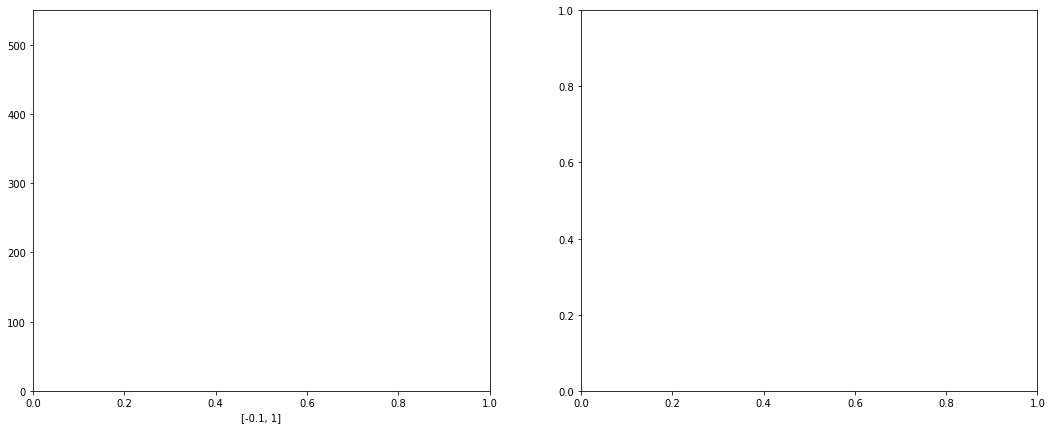

In [33]:
#————————————设定分类数————————————
n_clusters = 4


#——————————————————创建图和图对象————————————————
# 创建画布，一行两列
fig, (ax1, ax2) = plt.subplots(1, 2)  # 子图 一行两列

# 设置画布尺寸
fig.set_size_inches(18,7)

# 第一个图 每个簇轮廓系数组成的横向条形图  纵坐标就是每个样本


# 轮廓系数的取值是-1,1 但是在0以下可以认为聚类效果很差
ax1.set_xlabel([-0.1,1])

# 纵坐标就是每个样本 希望每一个簇中的样本并在一起
# 每个簇之间要有距离 ---> y轴的最大值要比所有的样本大  ---> 常见间隔
ax1.set_ylim([0,X.shape[0]+(n_clusters + 1)* 10])

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


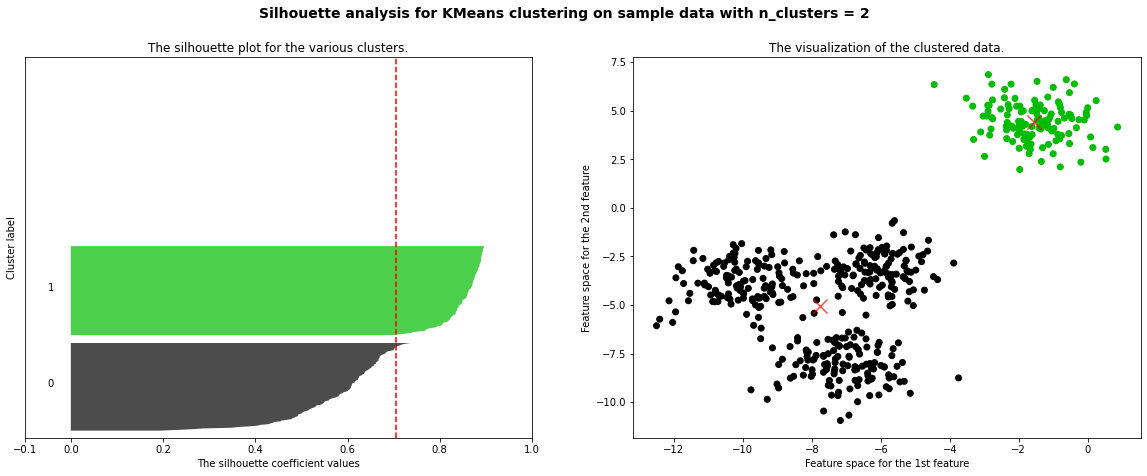

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


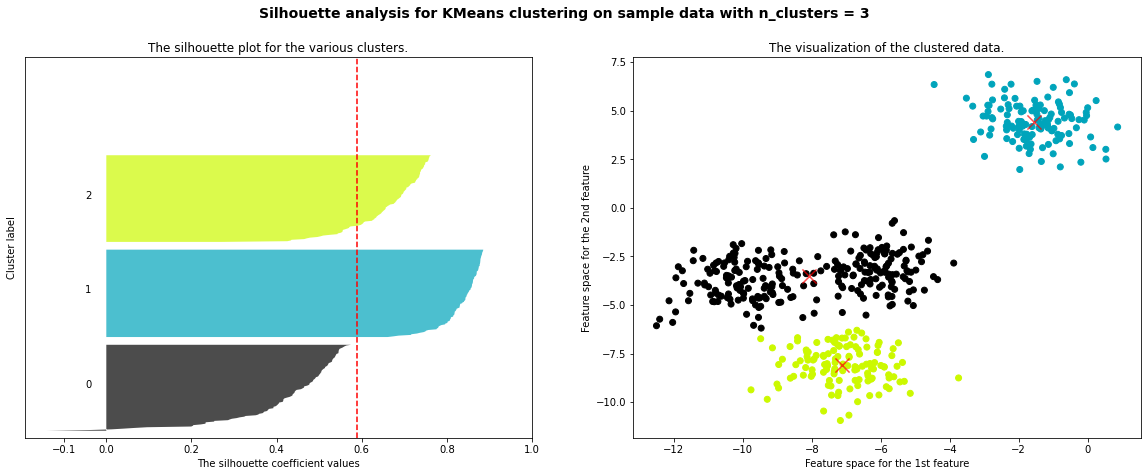

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


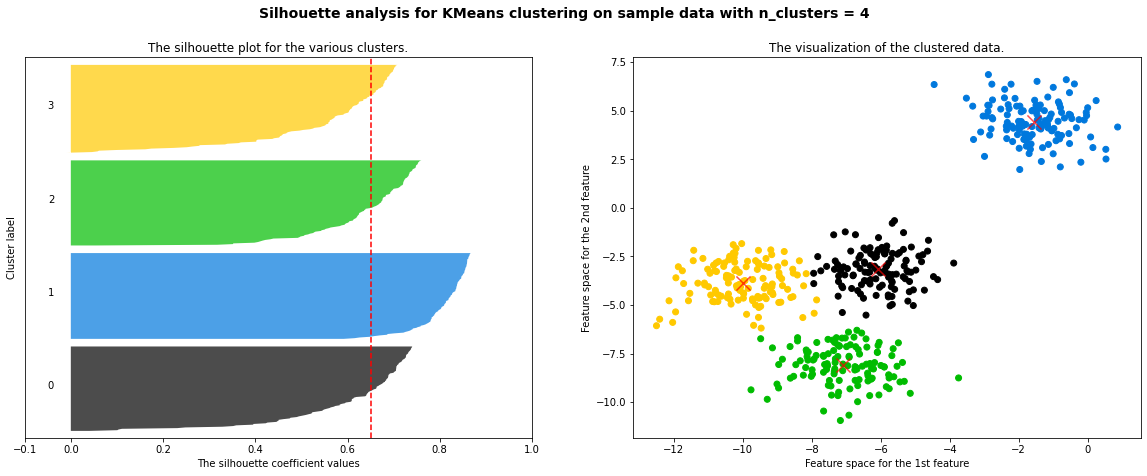

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


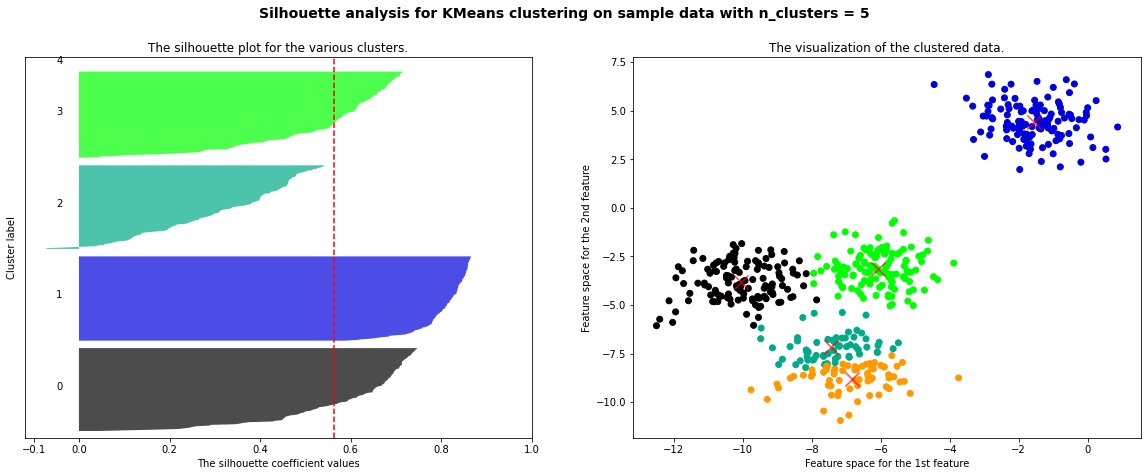

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


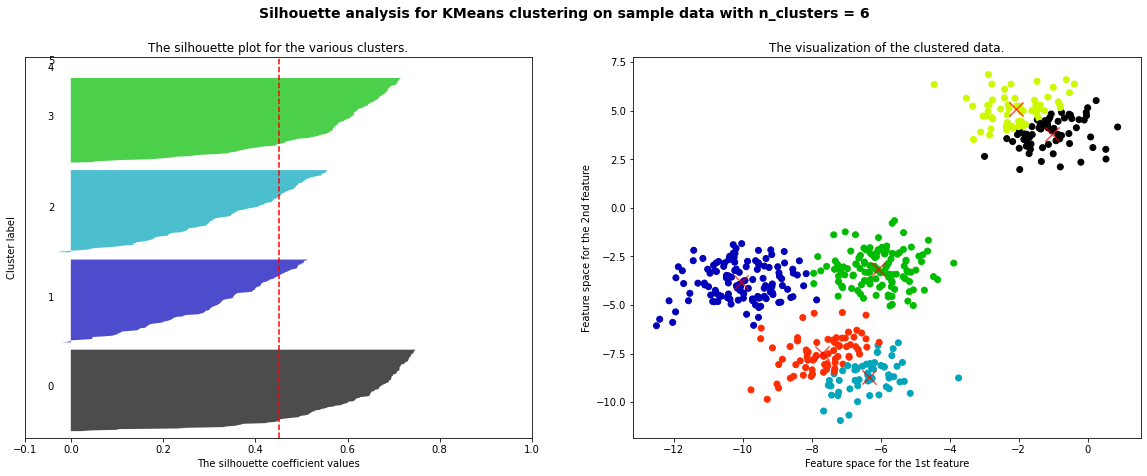

For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


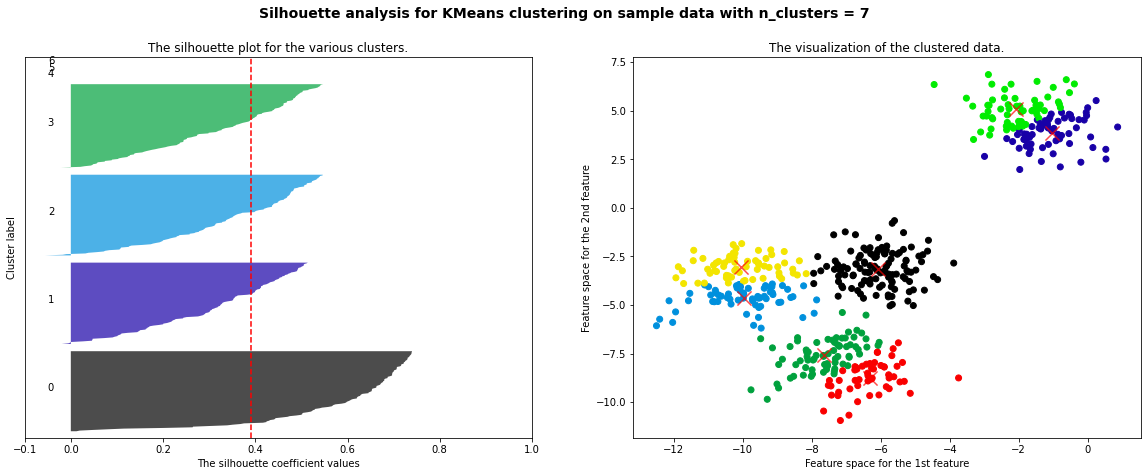

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
      #————————————设定分类数————————————
      n_clusters = n_clusters


      #——————————————————创建图和图对象————————————————
      # 创建画布，一行两列
      fig, (ax1, ax2) = plt.subplots(1, 2)  # 子图 一行两列

      # 设置画布尺寸
      fig.set_size_inches(20,7)

      # 轮廓系数的取值是-1,1 但是在0以下可以认为聚类效果很差
      ax1.set_xlabel([-0.1,1])

      # 纵坐标就是每个样本 希望每一个簇中的样本并在一起
      # 每个簇之间要有距离 ---> y轴的最大值要比所有的样本大  ---> 常见间隔
      ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])


      #————————————————建模——————————————————
      cluster = KMeans(n_clusters=n_clusters,random_state=10).fit(X)
      cluster_labels = cluster.labels_


      #——————————————调整轮廓系数——————————————
      silhouette_avg = silhouette_score(X,cluster_labels)
      # 每次返回当前簇下的整体的轮廓系数
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # 返回每个样本你的轮廓系数
      sample_silhouette_values = silhouette_samples(X, cluster_labels)


      #————————————————————画图1——————————————————

      # 设置y轴上的初始取值 不希望第一个样本贴着y轴
      y_lower = 10

      # 对每一个簇进行循环
      for i in range(n_clusters):
      # 抽出第i个簇的轮廓系数，并进行排序
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_.labels_ == i]
            ith_cluster_silhouette_values.sort()   # 排序会改变数据的顺序

            size_cluster_i = ith_cluster_silhouette_values.shape[0]  # 查看这个簇中的样本数

            # 设置y的终止值
            y_upper = y_lower + size_cluster_i

            # 调用colormap库中使用小数调用颜色的函数
            # 希望每个簇的颜色不同
            color = cm.nipy_spectral(float(i)/n_clusters)

            # 填充子图1中的内容
            # fill_betweenx() 让x轴的一定范围的柱状图都统一颜色的函数
            # fill_betweenx(上限，下限,x轴的取值，柱状图的颜色)
            ax1.fill_betweenx(np.arange(y_lower, y_upper)
                                    ,ith_cluster_silhouette_values
                                    ,facecolor=color
                                    ,alpha=0.7
                              )
            ax1.text(-0.05
                        , y_lower + 0.5 * size_cluster_i
                        , str(i))
           
            # 为下一个簇腾出间隔的空间
            y_lower = y_upper + 10

      # 添加一个簇的标签
      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  # 以虚线的形式画图
      ax1.set_yticks([])   # y轴上不显示刻度
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


      #————————————————绘制图2————————————————
      # 获取新颜色
      colors = cm.nipy_spectral(cluster.labels_.astype(float)/n_clusters)

      # 绘制散点图
      ax2.scatter(X[:,0],X[:,1],marker='o',c=colors,s=8)

      # 把生成的质心放到图像中去
      centers = cluster.cluster_centers_
      ax2.scatter(centers[:,0],centers[:,1],marker='x',c='red',alpha=1,s=200)

      # 设置图二的标题
      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")


      # 绘制整体的图的标签
      plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

      plt.show()


不知道为什么图像不能完成的出现

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


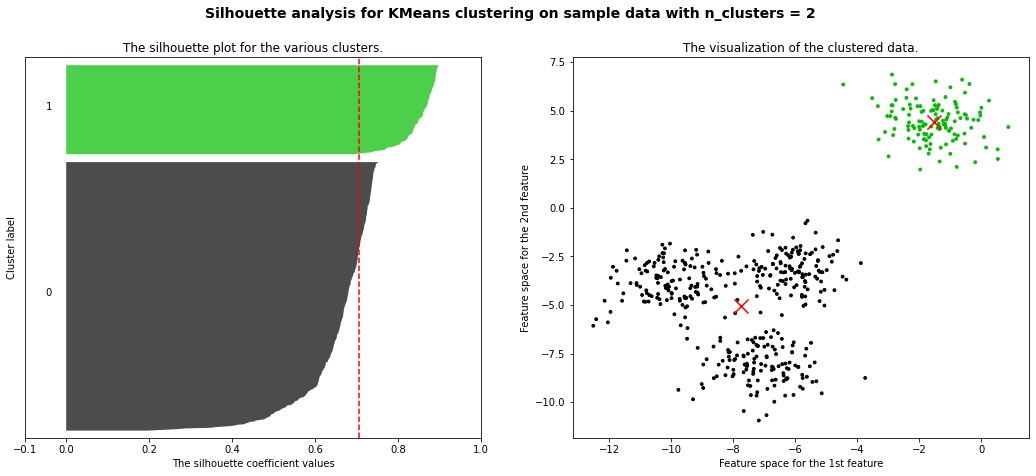

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


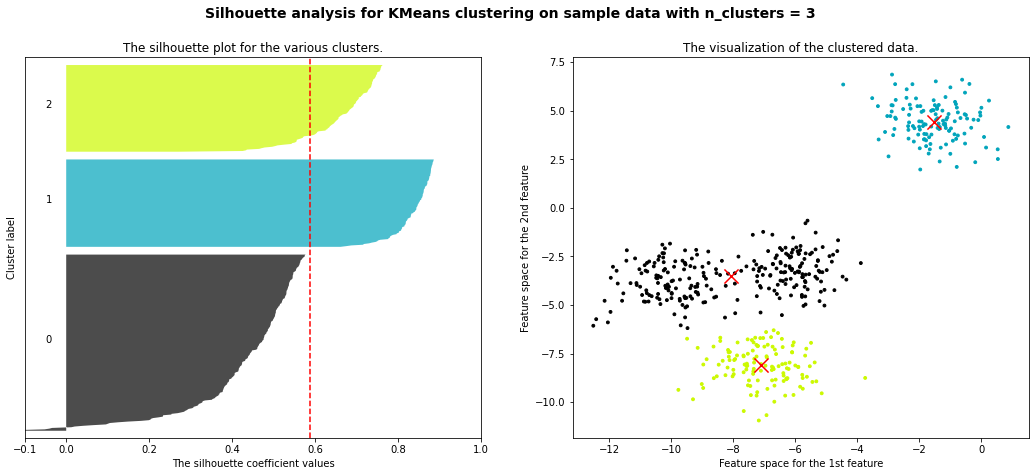

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


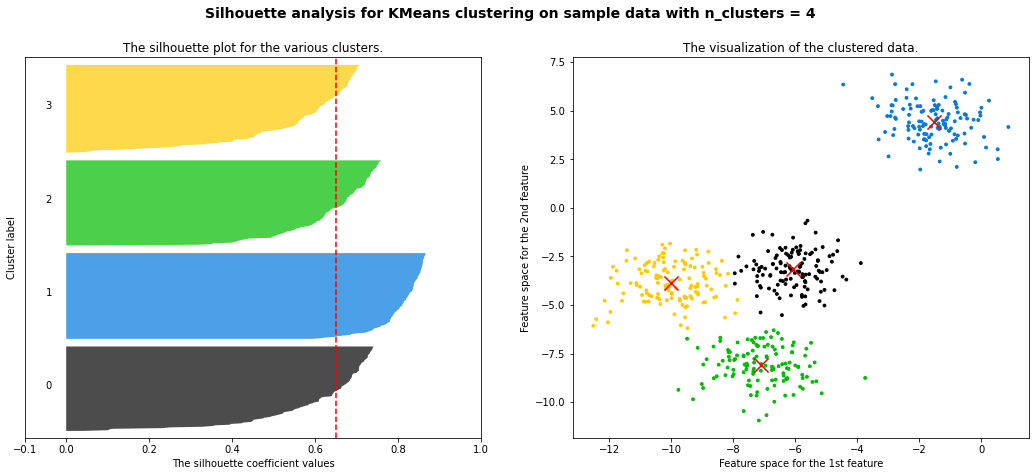

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


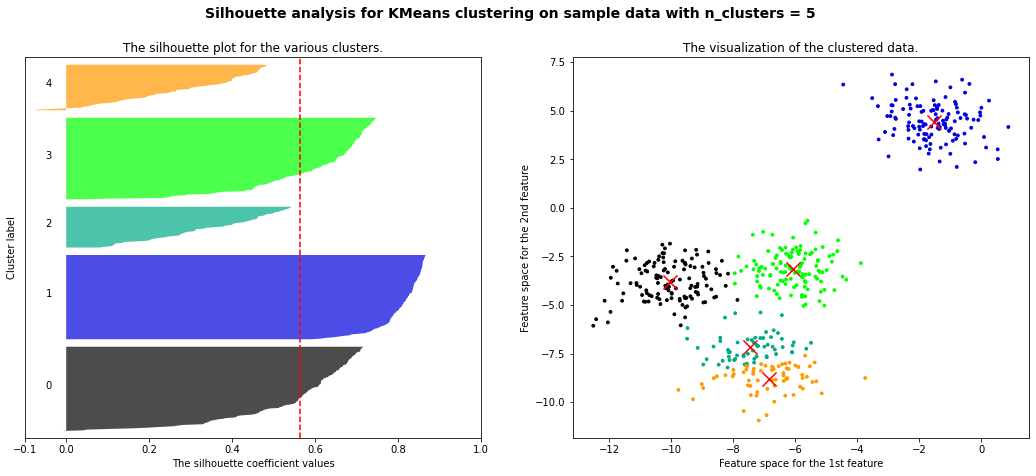

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


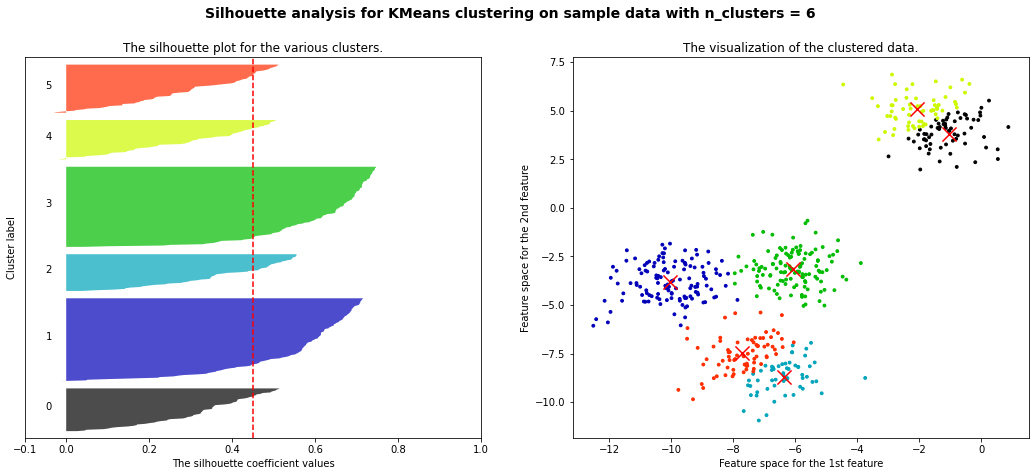

For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


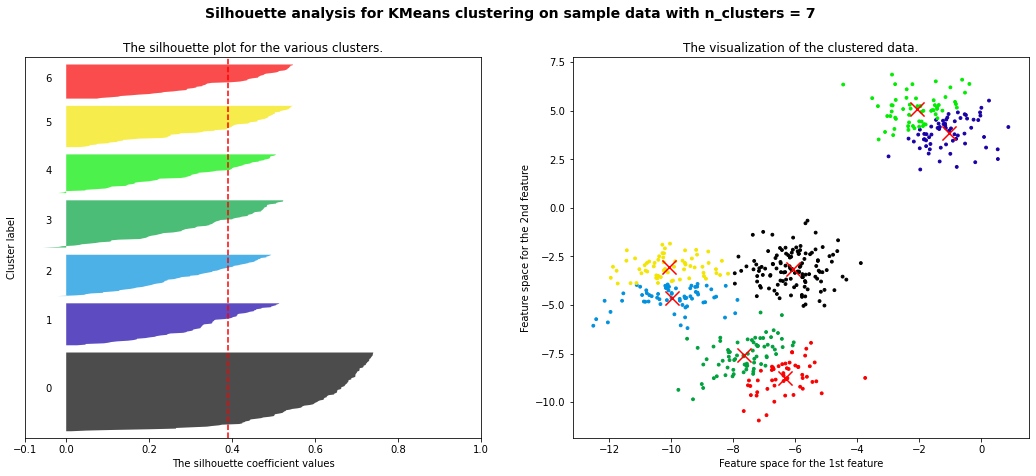

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

for n_clusters in [2,3,4,5,6,7]:
    n_clusters = n_clusters
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X)
    cluster_labels = clusterer.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                          ,ith_cluster_silhouette_values
                          ,facecolor=color
                          ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1]
                ,marker='o'
                ,s=8
                ,c=colors
               )
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="red", alpha=1, s=200)
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

### 3.2 重要参数init & random_state & n_init

sklearn中，我们使用参数init ='k-means ++'来选择使用k-means ++作为质心初始化的方案。通常来说，我建议保留默认的"k-means++"的方法。
init：可输入"k-means++"，"random"或者一个n维数组。这是初始化质心的方法，默认"k-means++"。输入"kmeans++"：一种为K均值聚类选择初始聚类中心的聪明的办法，以加速收敛。如果输入了n维数组，数组的形状应该是(n_clusters，n_features)并给出初始质心。
- `random_state`：控制每次质心随机初始化的随机数种子
- `n_init`：整数，默认10，使用不同的质心随机初始化的种子来运行k-means算法的次数。最终结果会是基于Inertia来计算的n_init次连续运行后的最佳输出
  - 不常用
- n_iter_ 调用迭代次数

In [56]:
t0 = time()
plus = KMeans(n_clusters=10).fit(X)
plus.n_iter_  # 调用迭代次数
time()-t0

0.13658690452575684

In [57]:
t0 = time()
random = KMeans(n_clusters=10,init='random',random_state=420).fit(X)
random.n_iter_
time()-t0

# 虽然迭代的次数 但是迭代的次数很快

0.08177947998046875

### 3.3 重要参数max_iter & tol

但在完全收敛之前，我们也可以使用max_iter，最大迭代次数，或者tol，两次迭代间Inertia下降的量，这两个参数来让迭代提前停下
来

- max_iter：整数，默认300，单次运行的k-means算法的最大迭代次数
- tol：浮点数，默认1e-4，两次迭代间Inertia下降的量，如果两次迭代之间Inertia下降的值小于tol所设定的值，迭代就会停下

In [61]:
random = KMeans(n_clusters=10,init='random',max_iter=10,random_state=420).fit(X)
y_pred_max10 = random.labels_
silhouette_score(X,y_pred_max10)

0.3952586444034157

In [60]:
random = KMeans(n_clusters=10,init='random',max_iter=20,random_state=420).fit(X)
y_pred_max20 = random.labels_
silhouette_score(X,y_pred_max20)

# 迭代的次数提高 反而分数很低

0.3401504537571701

### 3.4 重要属性与重要接口

**属性**
- cluster_centers 收敛的质心
- labels_ 每个样本对应的标签
- inertia 簇内平方和
- n_iter 实际迭代次数

**接口**
- fit(X,[训练用的标签])
- fit_predict
- fit_transform
- ger_params 获取该类的参数
- predict(X,[sample_weight])
- score(X,[权重]) 返回簇内平方和的负数

### 3.5 函数cluster.k_means

sklearn.cluster.k_means (X, n_clusters, sample_weight=None, init=’k-means++’, precompute_distances=’auto’,n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=None,algorithm=’auto’, return_n_iter=False)

函数k_means的用法其实和类非常相似，不过函数是输入一系列值，而直接返回结果。一次性地，函数k_means会
依次返回质心，每个样本对应的簇的标签，inertia以及最佳迭代次数。

In [62]:
from sklearn.cluster import k_means

k_means(X,4,return_n_iter=True)
# 返回4个质心，标签，簇内平方和）

(array([[ -6.08459039,  -3.17305983],
        [ -1.54234022,   4.43517599],
        [-10.00969056,  -3.84944007],
        [ -7.09306648,  -8.10994454]]),
 array([3, 3, 2, 1, 0, 1, 0, 0, 0, 0, 3, 3, 0, 1, 0, 3, 0, 3, 1, 0, 2, 2,
        0, 1, 0, 0, 1, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 2, 3, 2, 0, 2, 1, 0,
        0, 3, 2, 0, 1, 1, 1, 2, 2, 0, 3, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0,
        3, 0, 2, 2, 3, 2, 0, 3, 0, 0, 3, 0, 0, 2, 1, 1, 2, 1, 1, 2, 2, 1,
        2, 2, 1, 3, 2, 0, 1, 3, 3, 0, 3, 1, 1, 3, 1, 2, 1, 0, 0, 1, 1, 2,
        0, 3, 1, 2, 1, 2, 1, 0, 1, 0, 2, 3, 3, 2, 0, 2, 1, 3, 3, 0, 1, 2,
        2, 2, 2, 3, 1, 0, 1, 1, 0, 3, 0, 1, 1, 1, 0, 0, 3, 3, 2, 2, 1, 3,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 0, 1, 3, 2, 0, 3, 1, 2,
        2, 2, 2, 3, 0, 2, 1, 3, 3, 2, 0, 3, 3, 0, 1, 1, 3, 3, 0, 1, 0, 3,
        3, 1, 3, 2, 1, 0, 0, 3, 0, 2, 3, 0, 2, 0, 2, 3, 0, 0, 0, 1, 2, 1,
        0, 3, 2, 0, 2, 2, 2, 1, 2, 1, 3, 2, 3, 2, 1, 1, 2, 3, 1, 3, 0, 2,
        3, 3, 3, 3, 0, 2, 3, 2, 

## 4.案例：聚类算法用于降维，KMeans的矢量量化应用

K-Means聚类最重要的应用之一是非结构数据（图像，声音）上的矢量量化（VQ）。非结构化数据往往占用比较多的储存空间，文件本身也会比较大，运算非常缓慢，我们希望能够在保证数据质量的前提下，尽量地缩小非结构化数据的大小，或者简化非结构化数据的结构。

用K-Means聚类中获得的质心来替代原有的数据，可以把数据上的信息量压缩到非常小，但又不损失太多信息。我们接下来就通过一张图图片的矢量量化来看一看K-Means如何实现压缩数据大小，却不损失太多信息量

In [63]:
#————————————————————————————1.导入库————————————————————————————
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image  # 导入图片数据所用的类
from sklearn.utils import shuffle  #打乱一个有序的序列（数组 列表）

In [66]:
#————————————————————————————2.导入数据————————————————————————————
china = load_sample_image('china.jpg')   # 图片是三维数据
china
china.dtype   # 查看数据的类型
china.shape   #  长度 * 宽度 * 像素 > 三个数决定的颜色

(427, 640, 3)

In [67]:
china[0][0]

array([174, 201, 231], dtype=uint8)

In [72]:
# 包含了多少中不同的颜色？
newimage = china.reshape((427 * 640,3))


In [74]:
newimage.shape

(273280, 3)

In [77]:
import pandas as pd
pd.DataFrame(newimage).drop_duplicates().shape

# 有9w+ 种颜色

(96615, 3)

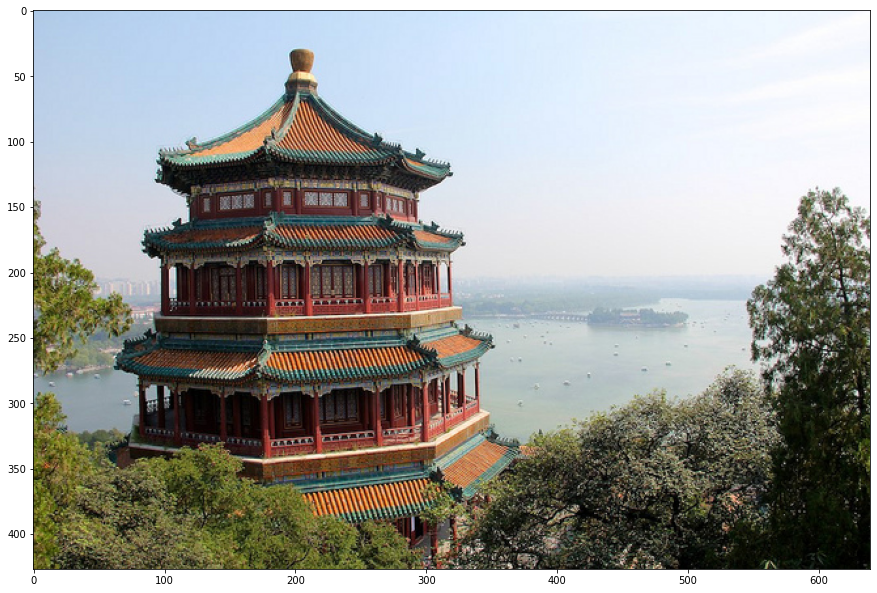

In [78]:
# 图形可视化
plt.figure(figsize=(15,15))
plt.imshow(china)   # imshow() 导入三维数组

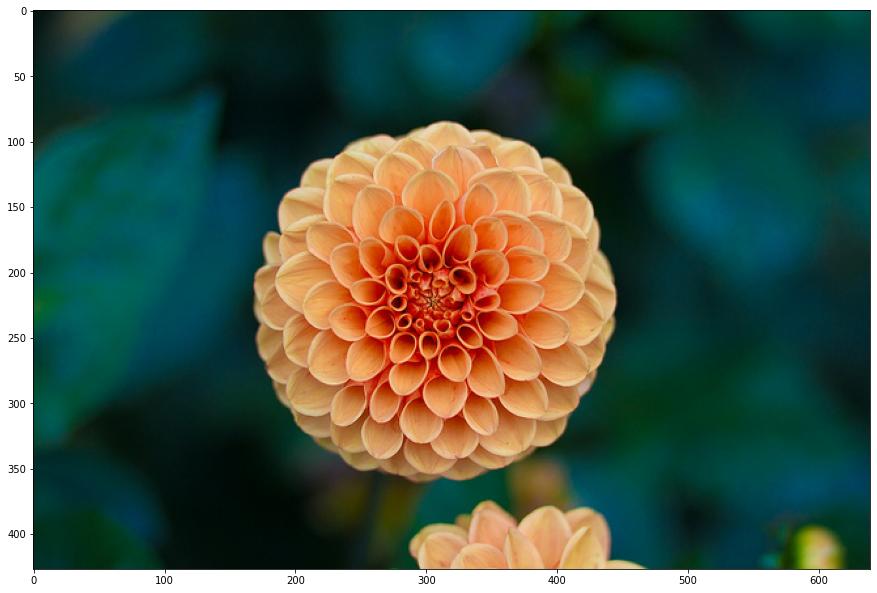

In [81]:
import pandas as pd

flower = load_sample_image("flower.jpg")
plt.figure(figsize=(15,15))
plt.imshow(flower)

K-Means来将9W种颜色聚类成64类，然后使用64个簇的质心来替代全部的9W种颜色，记得质心有着这样的性质：簇中的点都是离质心最近的样本点。
为了比较，我们还要画出随机压缩到64种颜色的矢量量化图像。我们需要随机选取64个样本点作为随机质心，计算原数据中每个样本到它们的距离来找出离每个样本最近的随机质心，然后用每个样本所对应的随机质心来替换原本的样本。两种状况下，我们观察图像可视化之后的状况，以查看图片信息的损失。

In [82]:
n_clusters = 64

china = np.array(china, dtype=np.float64) / china.max()
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [85]:
# plt.imshow 在浮点数上的表现非常优异 吧china 中的数据转为0~1之间的浮点数
china = np.array(china,dtype=np.float64) / china.max()


In [87]:
# 吧china 从图像格式 转换为矩阵的格式
w, h, d = original_shape = tuple(china.shape)
print(w,h,d)

427 640 3


In [93]:
assert d == 3
# assert 如果不等于3 就报错



In [95]:
image_array = np.reshape(china, (w * h, d))
image_array
image_array.shape

(273280, 3)

**对数据进行K-Means的矢量量化**

In [96]:
# 打乱顺序 随机取出1000个颜色 放到KMeans中
n_clusters = 64

image_array_sample = shuffle(image_array, random_state=0)[:1000]  
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_

array([[0.62570806, 0.60261438, 0.53028322],
       [0.15546218, 0.1557423 , 0.12829132],
       [0.82063983, 0.89896801, 0.98462332],
       [0.42039216, 0.43843137, 0.2227451 ],
       [0.69527105, 0.74994233, 0.76516724],
       [0.92174422, 0.9556336 , 0.99514194],
       [0.07058824, 0.0754637 , 0.0508744 ],
       [0.28205128, 0.26395173, 0.19638009],
       [0.46509804, 0.43372549, 0.36901961],
       [0.71328976, 0.41960784, 0.31851852],
       [0.83529412, 0.86349206, 0.89505135],
       [0.76068627, 0.85617647, 0.9604902 ],
       [0.36372549, 0.36830065, 0.31405229],
       [0.34509804, 0.1654902 , 0.12901961],
       [0.53448674, 0.53264129, 0.50657439],
       [0.15098039, 0.24444444, 0.25228758],
       [0.56764706, 0.61993464, 0.6369281 ],
       [0.89411765, 0.63764706, 0.43529412],
       [0.58823529, 0.5630719 , 0.40588235],
       [0.60392157, 0.30326797, 0.25882353],
       [0.50784314, 0.31568627, 0.17908497],
       [0.0310856 , 0.0288857 , 0.01759923],
       [0.

In [97]:
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [102]:
# 用质心替换所有的样本
image_kmeans = image_array.copy()

image_array.shape  # 27w个样本 9w种颜色

for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

# 查看生成的图片信息
pd.DataFrame(image_kmeans).drop_duplicates().shape  # 编程了64个颜色

# 恢复图片的结构
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

**对数据进行随机的矢量量化**

In [103]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)

# pairwise_distances_argmin(x1,x2,axis=0)
# - x1 x2 分别是两个序列 计算x2中每个样本到x1中每个样本点的距离


(273280,)

In [ ]:

labels_random.shape


In [104]:
len(set(labels_random))


64

In [105]:
image_random = image_array.copy()

for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
# 用随机质心 填充数据

# 恢复图片的机构
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

将原图，按KMeans矢量量化和随机矢量量化的图像绘制出来

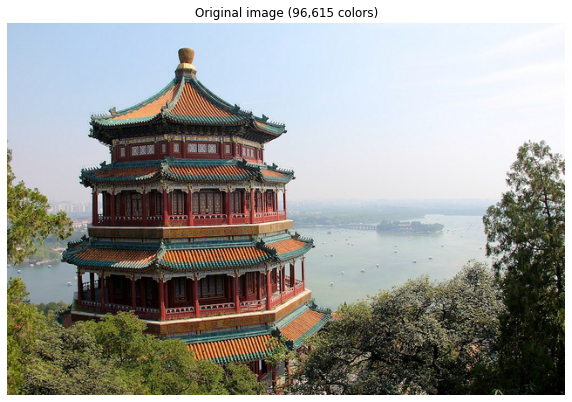

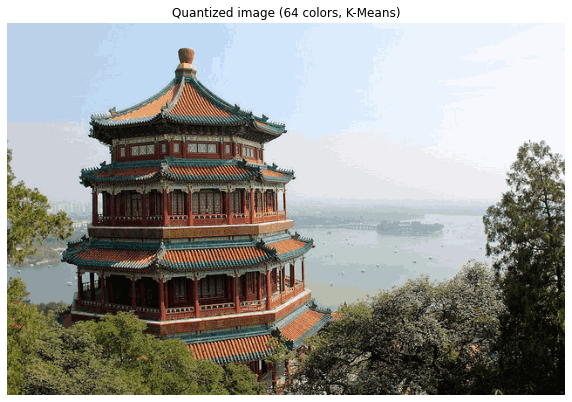

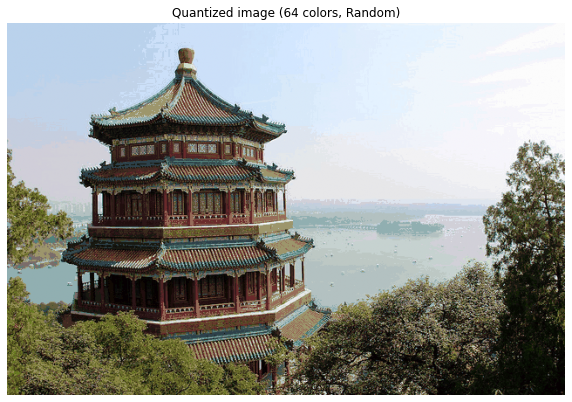

In [106]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)

plt.show()